Data Preprocessing Project Tutorial


Airbnb in New York

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
#Saving the data to the specified folder (data/raw)
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [3]:
# Obtaining the dimensions
print(total_data.shape)

(48895, 16)


In [4]:
# Obtaining information about data types and non-null values
print(total_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

    The dataset has 48895 rows (in this case, flats or rooms) and 16 columns.
    The variables "last_review" and "reviews per month" only have 38843 instances with values, so each of them contains 10052 null values. The variables "name" and "host_name" also have null values, but just a couple of them. The rest of the variables always have a value.
    The data is divided into:
    - 8 numerical characteristics (latitude, longitude, price, minimum_nights, number_of_review, last_review, reviews_per_month and calculated_host_listings_count)
    - 8 categorical characteristics (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type and availability_365).

In [5]:
#Looking for possible duplicates
print(total_data['id'].duplicated().sum())
print(total_data['name'].duplicated().sum())


0
989


There are no duplicates if we check by 'id', which is good since each accommodation should have a different reference number. 
There are 989 duplicates when searching by "name". We cannot know for sure it means there are some accommodations duplicated because owners are free to name their property and most of them tend to use the same or very similar words since it's the way the can attract clients' attention. 

In [6]:
#Eliminating irrelevant information
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()   

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


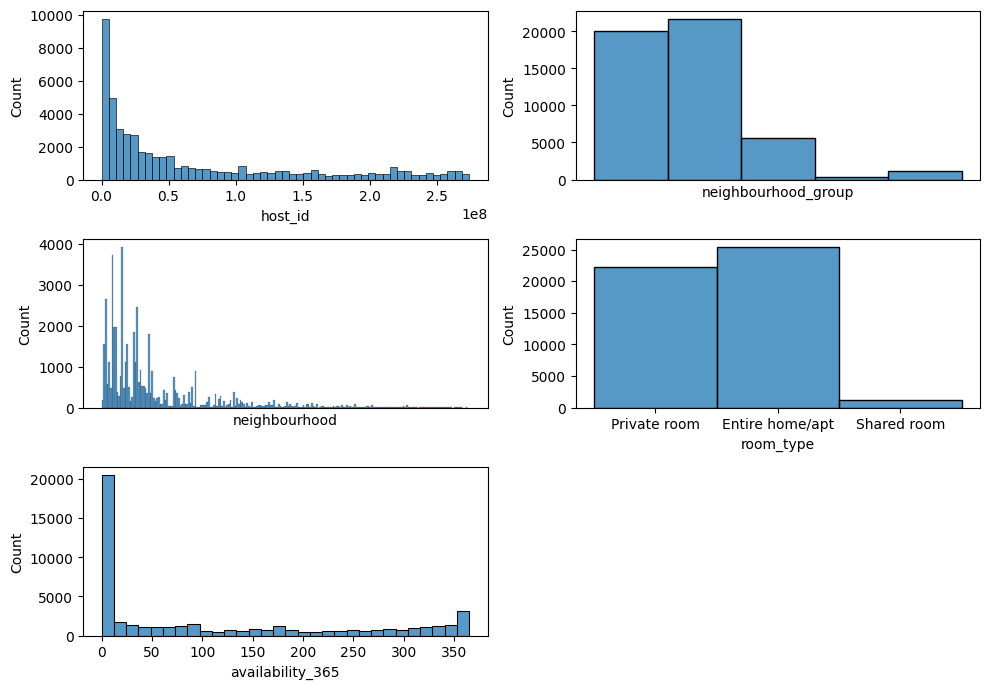

In [8]:
#Analysis on categorial variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis=plt.subplots(3,2, figsize=(10,7))

#Creating a multiple histogram
sns.histplot(ax= axis[0,0], data=total_data, x="host_id")
sns.histplot(ax= axis[0,1], data=total_data, x="neighbourhood_group").set_xticks([])
sns.histplot(ax= axis[1,0], data=total_data, x="neighbourhood").set_xticks([])
sns.histplot(ax= axis[1,1], data=total_data, x="room_type")
sns.histplot(ax= axis[2,0], data=total_data, x="availability_365")
fig.delaxes(axis[2, 1])

#Adjusting layout
plt.tight_layout()

#Showing the plot
plt.show()

- Host_id: There is quite a few owners with serveral accommodations listed, but there is also a lot of missing values in this category. 
- Neighbourhoud_group: The apartments in the dataset are located in the 5 areas, the 5 boroughs New York City is divided into (Brooklyn, Manhattan, Queens, Staten Island and Bronx). We can observe that about 80% of the apartments listed are located in two of these areas. 
- Neighbourhood: The apartments in the dataset are located in quite a few neighbourhoods, but in some of them (as seen in the neighbourhoud_group plot) there's much more accommodation listed. 
- Room_type: Most of the listed accommodations are private rooms or entire apartments, and just a few shared rooms.
- Availability_365: Most of the rooms are available the whole year, but there is quite a few 0/NaN values in this category. 

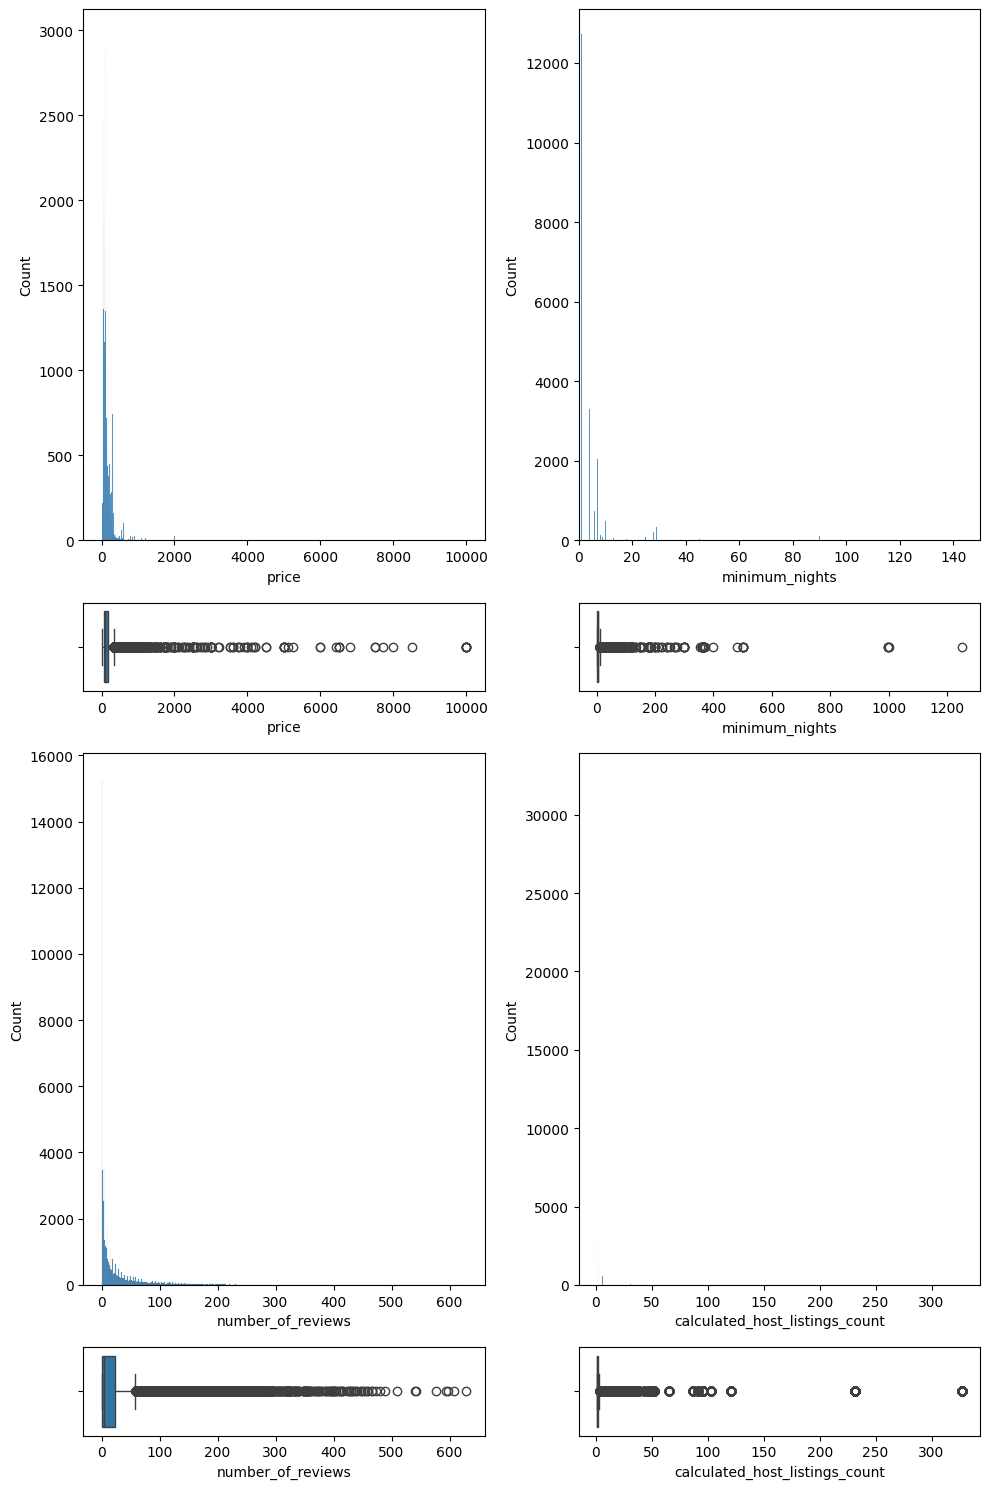

In [9]:
#Analysis of numeric variables

fig, axis= plt.subplots (4,2, figsize=(10,15), gridspec_kw={'height_ratios':[6,1,6,1]})

#Creating a multiple figure with histogram and box plots
sns.histplot(ax=axis[0,0], data=total_data, x="price")
sns.boxplot(ax=axis[1,0], data=total_data, x="price")
sns.histplot(ax=axis[0,1], data=total_data, x="minimum_nights").set_xlim(0, 150)
sns.boxplot(ax=axis[1,1], data=total_data, x="minimum_nights")
sns.histplot(ax=axis[2,0], data=total_data, x="number_of_reviews")
sns.boxplot(ax=axis[3,0], data=total_data, x="number_of_reviews")
sns.histplot(ax=axis[2,1], data=total_data, x="calculated_host_listings_count")
sns.boxplot(ax=axis[3,1], data=total_data, x="calculated_host_listings_count")


#Adjusting the layout
plt.tight_layout()

#Showing the plot
plt.show()



From the previous graphs we can observe:
- price: there is a few accommodations with price 0, so we may have a few errors. 
- minimum_nights: we have as well quite a few accommodations whose minimum nights is 0 (which does not make sense in real life) and quite a few outliers.
- number_of_reviews: there is a wide variety of results, from accommodations with 0 reviews to others who have more than 600. It makes sense since some accommodations may have been recently added to the platform while others may have been available for guests for a few years even.  
- calculated_host_listings_count: as in the minimum_nights variable, we have as well quite a few accommodations whose minimum nights is 0 (which does not make sense in real life) and quite a few outliers.

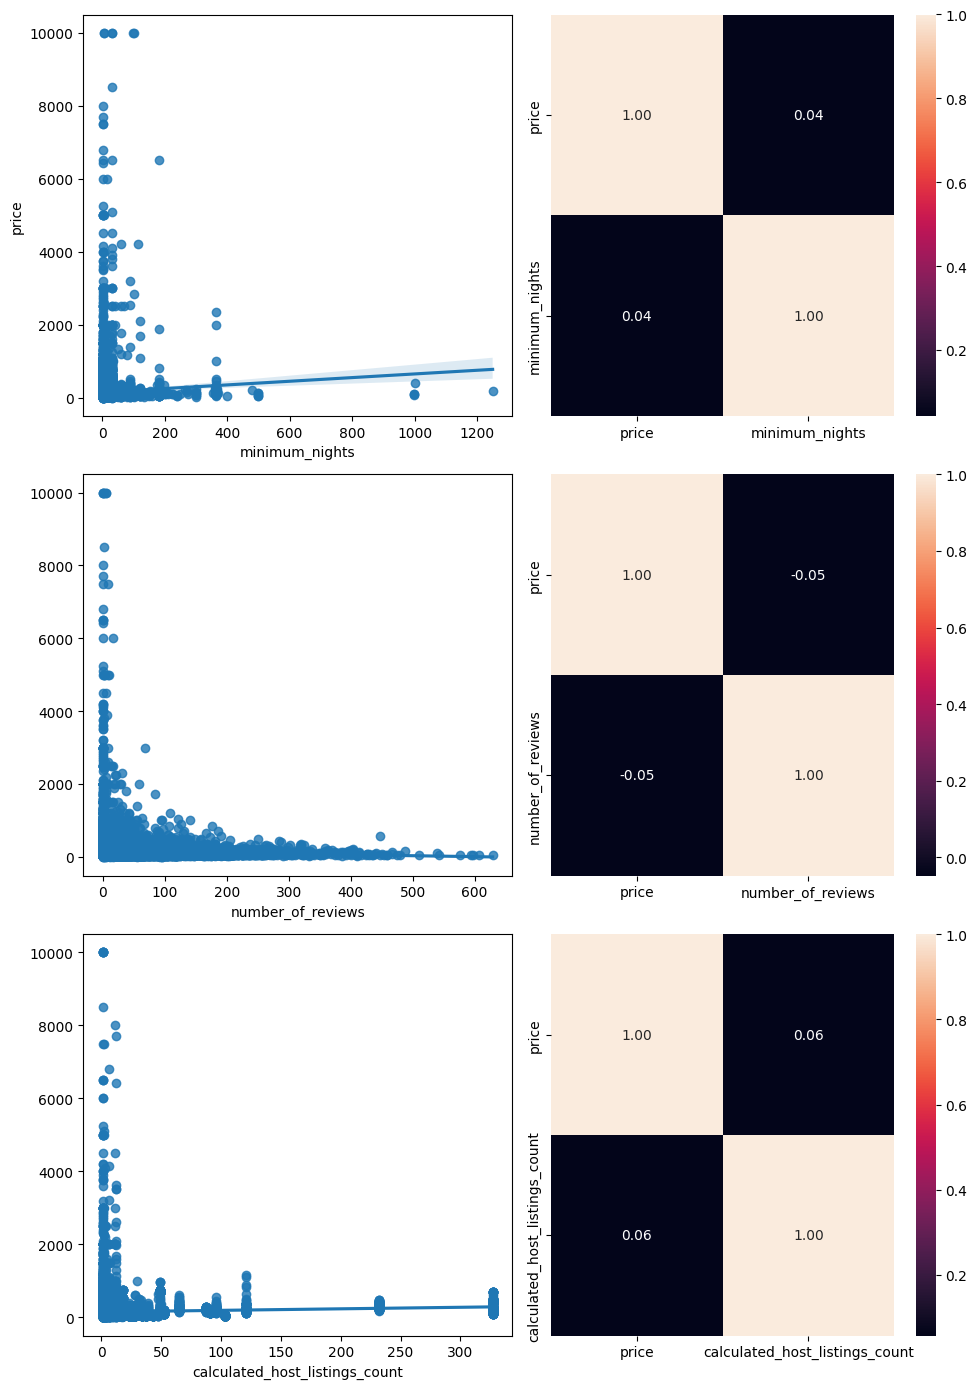

In [10]:
#Analysis of multivariate variables

# Numerical - Numerical Analysis

fig, axis = plt.subplots(3, 2, figsize = (10, 14))

# Creating a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[0, 1])
sns.regplot(ax = axis[1, 0], data = total_data, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])


# Adjusting the layout
plt.tight_layout()

# Showing the plot
plt.show()





From the plots, we can see that there is no relation between the price and the other numerical variables: minimum nights, reviews and calculated host listings count. 
 


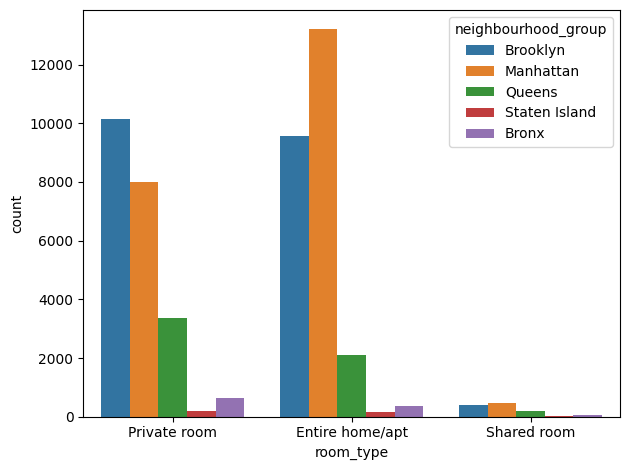

In [11]:
#Categorical-categorical analysis

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.tight_layout()

plt.show()

The following conclusions can be drawn from the above graph:
- most of the accommodations available are either private rooms or entire appartments, whereas the number of shared rooms is much lower.
- most of the accommodations are located in two neighbourhood groups: Brooklyn and Manhattan.
- the number of accommodations available in Staten Island is minimal.

In [12]:
#Numerical-categorical analysis
#Correlation analysis: Factorizing categorial values
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]

#Saving the dictionaries for room, neighbourhood_group and neighbourhood_conversion
total_data.drop_duplicates(["room_type", "room_type_n"])[["room_type", "room_type_n"]].to_excel("/workspaces/machine-learning-python-template/data/processed/room_type_to_room_typen.xlsx", index = False)
total_data.drop_duplicates(["neighbourhood_group", "neighbourhood_group_n"])[["neighbourhood_group", "neighbourhood_group_n"]].to_excel("/workspaces/machine-learning-python-template/data/processed/neighbourhood_group_to_neighbourhood_groupn.xlsx", index = False)
total_data.drop_duplicates(["neighbourhood", "neighbourhood_n"])[["neighbourhood", "neighbourhood_n"]].to_excel("/workspaces/machine-learning-python-template/data/processed/neighbourhood_to_neighbourhoodn.xlsx", index = False)


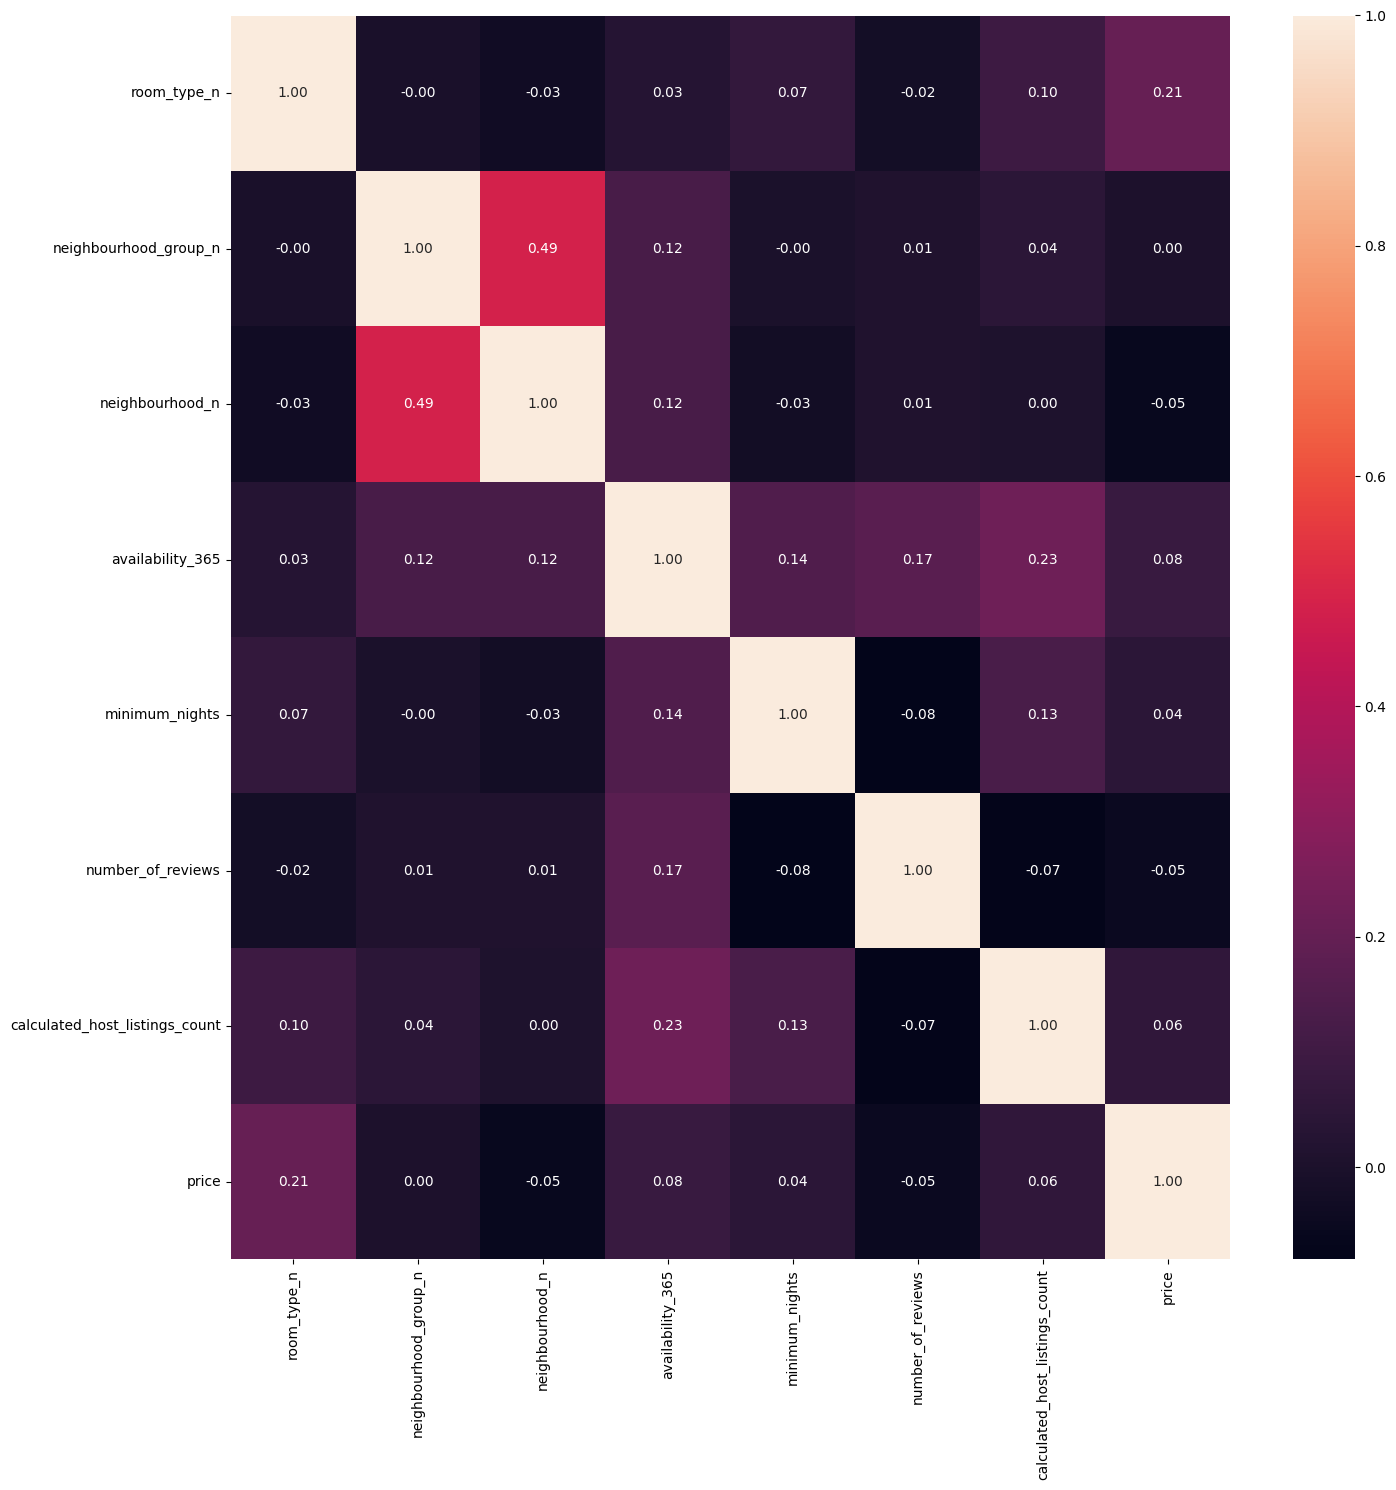

In [13]:
#Heatmap creation
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(total_data[["room_type_n", "neighbourhood_group_n", "neighbourhood_n", "availability_365", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()


From the graph, we can conclude that there aren't really significant relations between the variables. The two most significative can be found between room_type and price (it makes sense taking into accont that there are entire appartments and private and shared rooms) and between availability_365 and calculated_host_listings_count (showing that the more appartments an owner has, the more availability he offers).

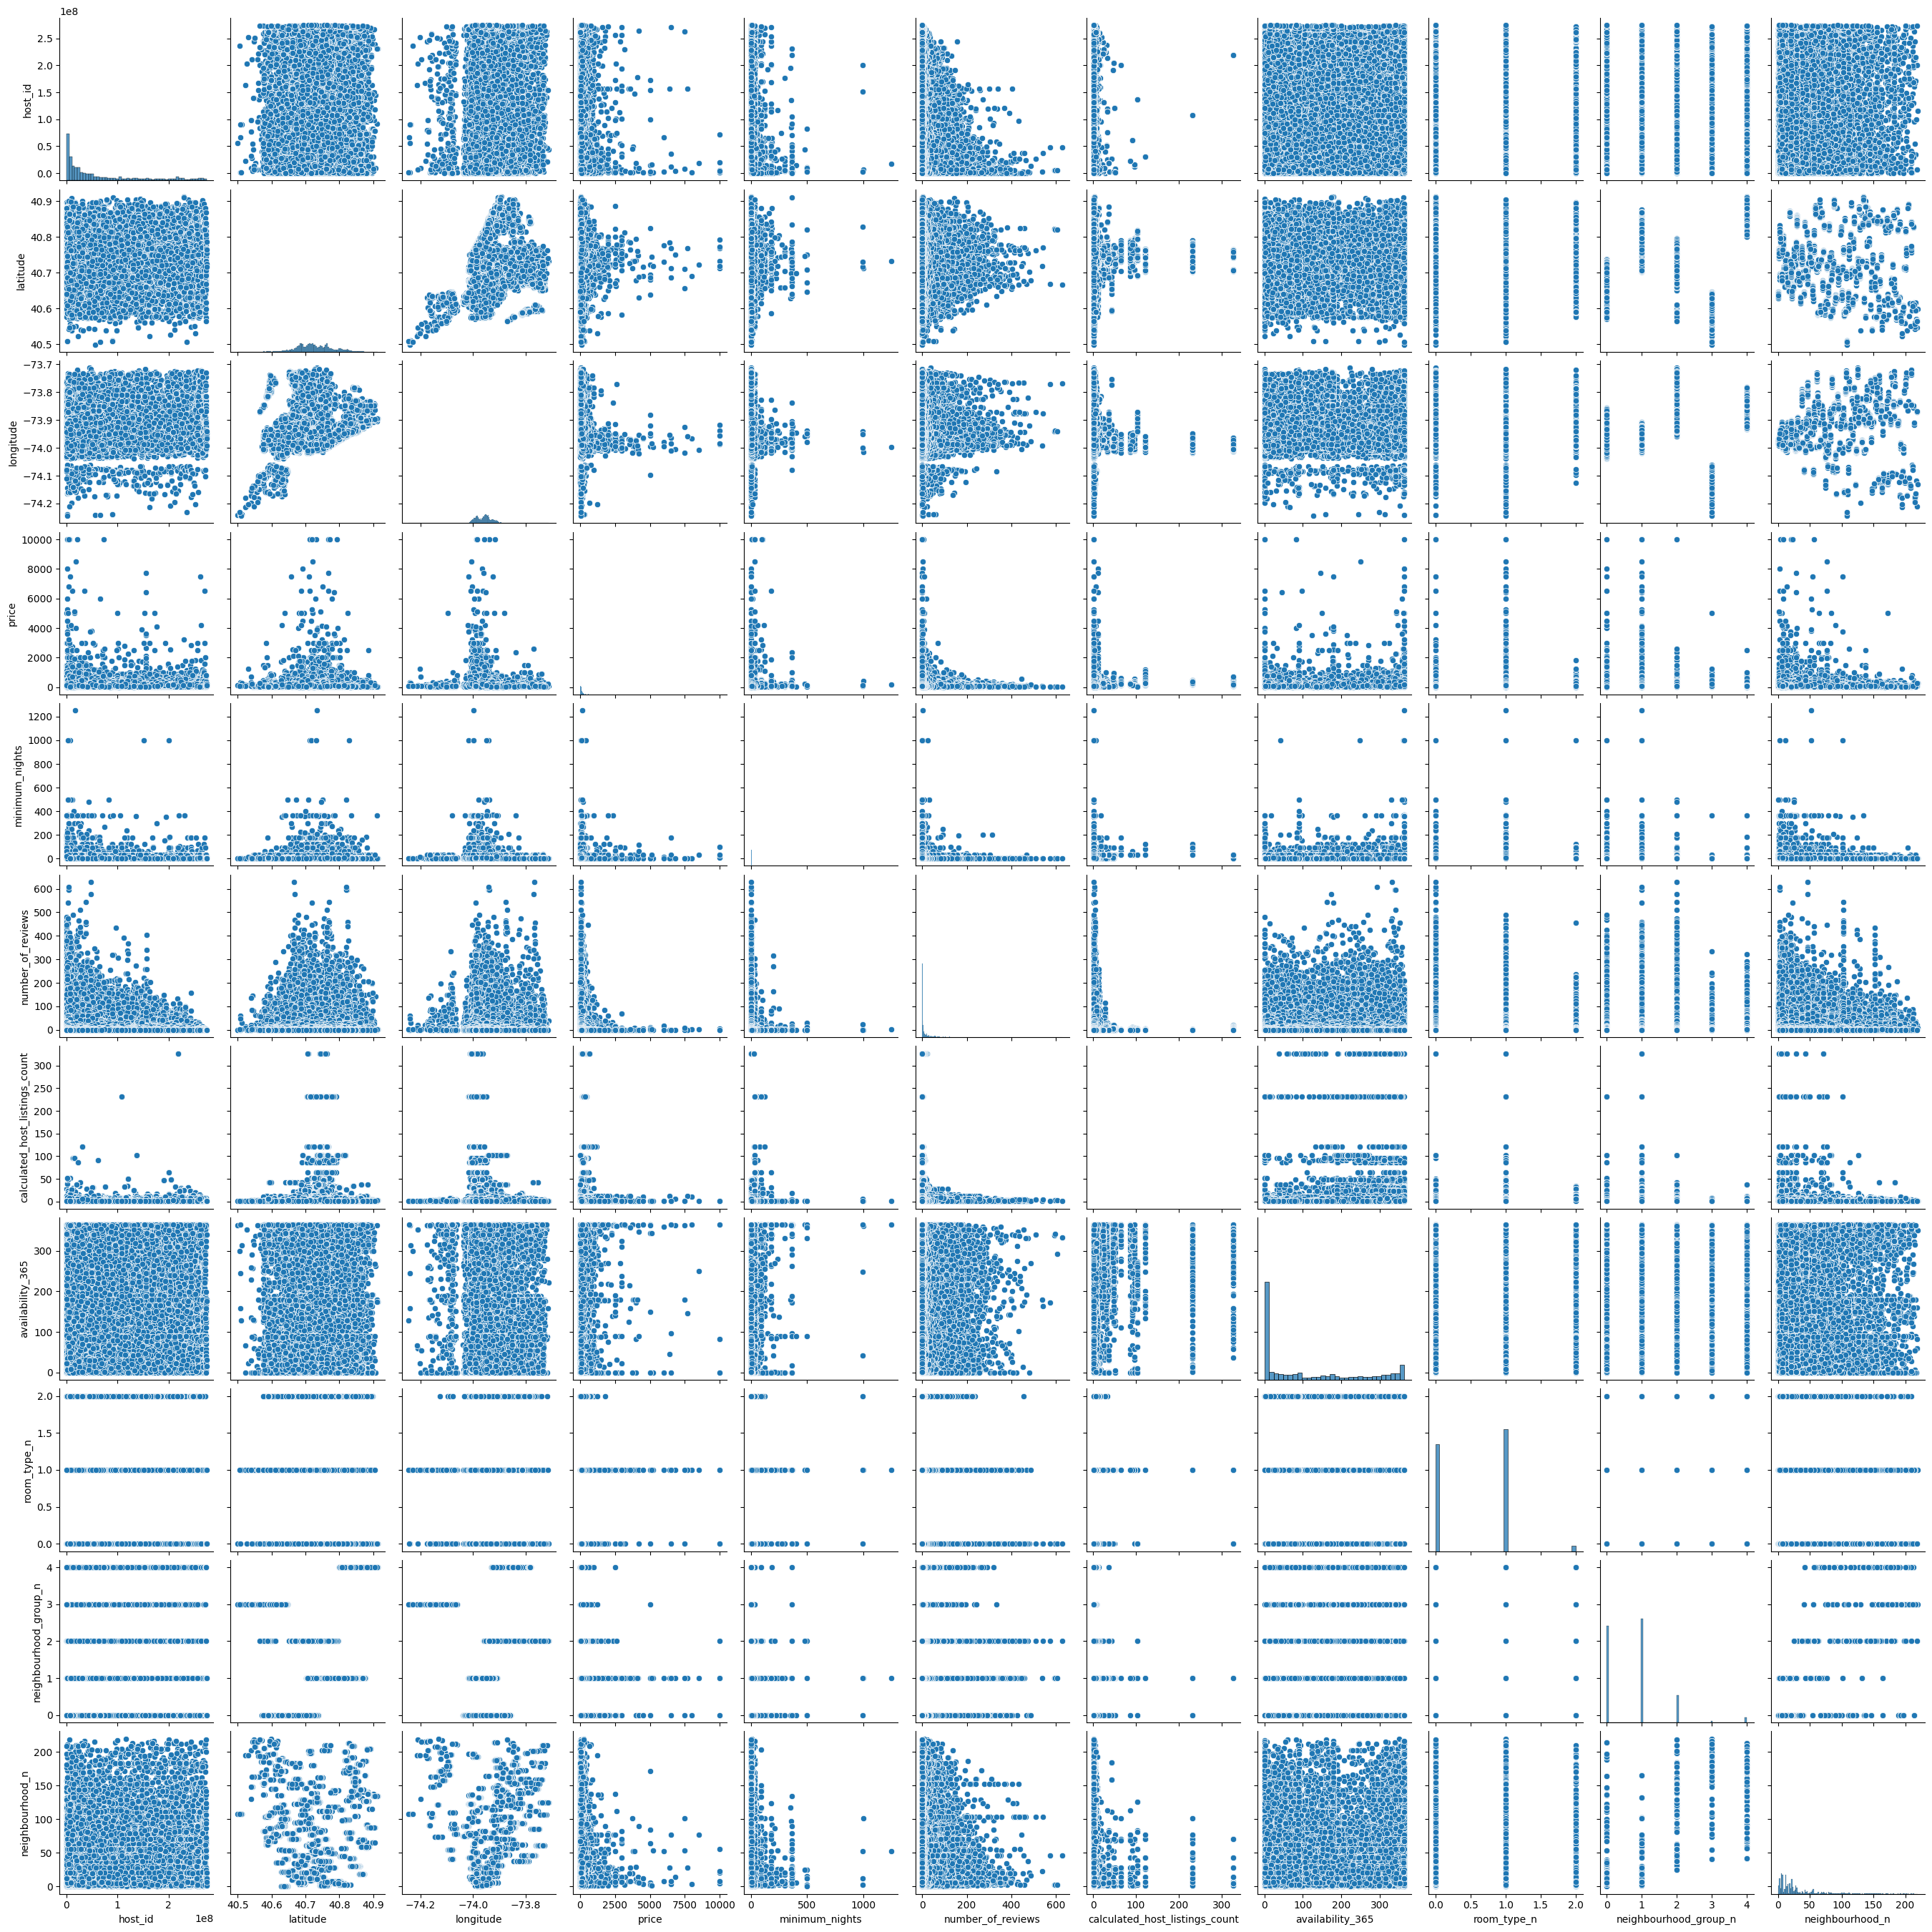

In [14]:
#Drawing the pairplot
sns.pairplot(data = total_data)

In [15]:
#Outlier analysis
total_data.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911,29.888782
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386,34.676634
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000,220.000000


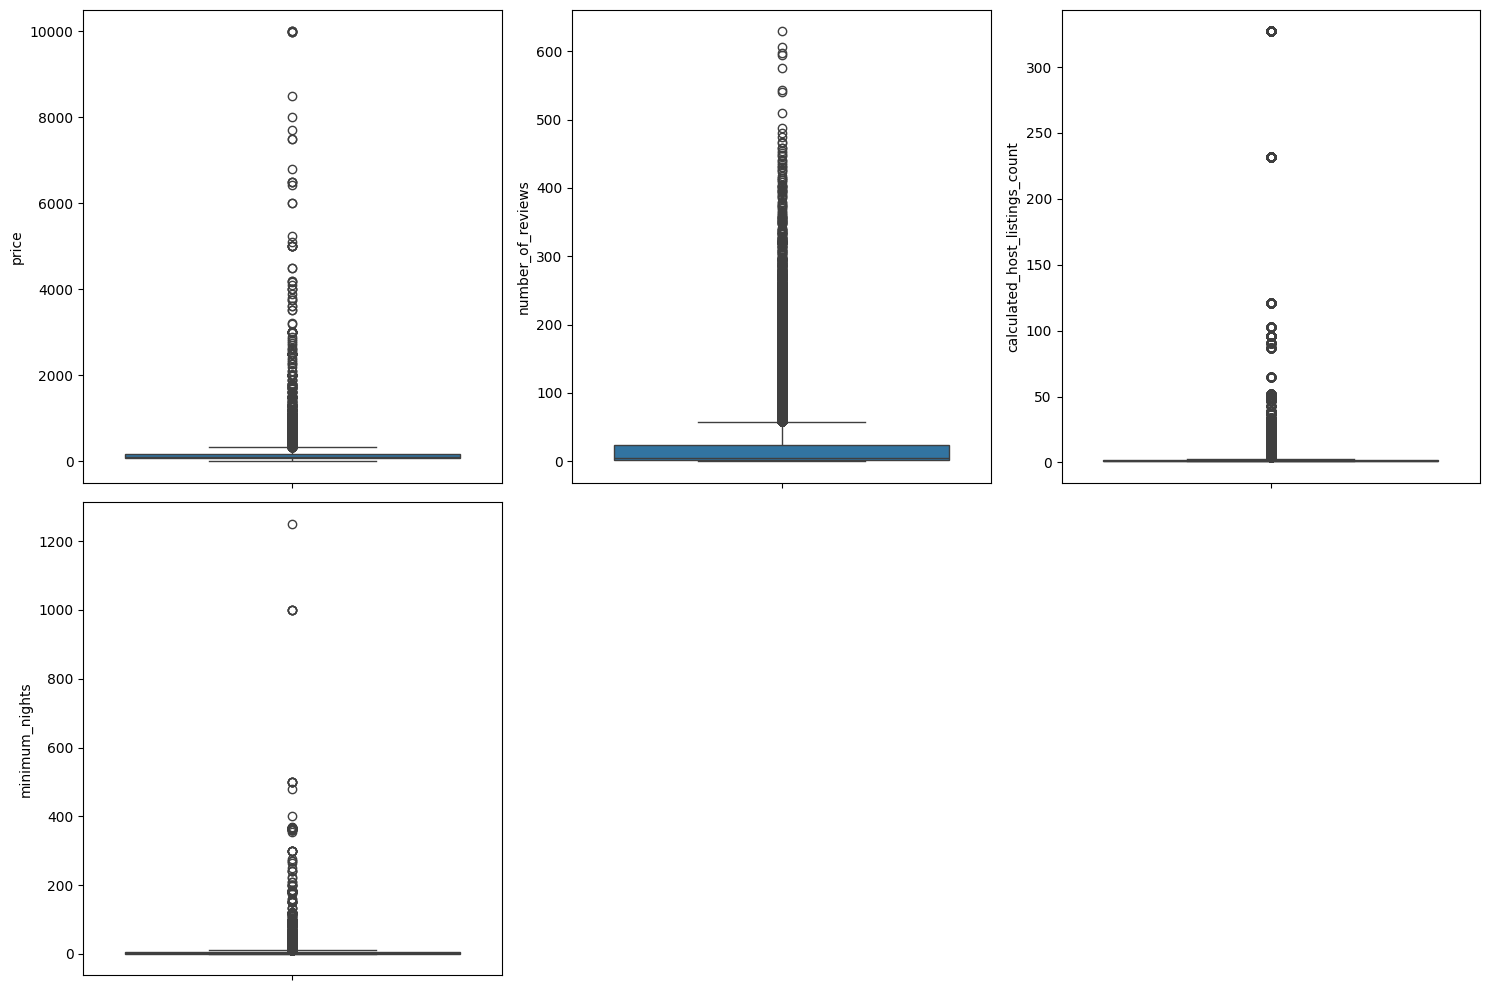

In [16]:
#Creating boxplots to check outliers
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "minimum_nights")

plt.delaxes(ax = axis[1, 1]); plt.delaxes(ax = axis[1, 2])

plt.tight_layout()

plt.show()

From the graph, we can conclude that the variables "price" (our target), "minimum_nights", "number_of_reviews" and "calculated_host_listings_count" have a significant number of outliers. 

In [17]:
#Analysing the price variable
price_stats = total_data["price"].describe()
print(price_stats)

price_iqr = price_stats["75%"] - price_stats["25%"]
price_upper_limit = price_stats["75%"] + 1.5*price_iqr
price_lower_limit = price_stats["25%"] - 1.5*price_iqr

print(f"The upper limit is {round(price_upper_limit, 2)} and the lower limit is {round(price_lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
The upper limit is 334.0 and the lower limit is -90.0, with an interquartile range of 106.0


In [18]:
#Removing accommodations with price 0
total_data=total_data[total_data["price"] >0]

In [19]:
#Creating the variable for no outliers
total_data_no_outliers = total_data.copy() 

In [20]:
#Analysing the minimum_nights variable
nights_stats = total_data["minimum_nights"].describe()
print(nights_stats)
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
nights_upper_limit = nights_stats["75%"] + 1.5*nights_iqr
nights_lower_limit = nights_stats["25%"] - 1.5*nights_iqr

print(f"The upper limit is {round(nights_upper_limit, 2)} and the lower limit{round(nights_lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")    


count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64
The upper limit is 11.0 and the lower limit-5.0, with an interquartile range of 4.0


In [21]:
from statistics import mode

mode_nights = total_data["minimum_nights"].mode()
#print (mode_nights)

# Replacing outliers with the mode value
total_data_no_outliers['minimum_nights'] = total_data_no_outliers['minimum_nights'].apply(lambda x: mode_nights[0] if x > 11 else x)
total_data_no_outliers.head

<bound method NDFrame.head of         host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

         

In [22]:
#Analysing the number_of_reviews variable
reviews_stats = total_data["number_of_reviews"].describe()
print(reviews_stats)
reviews_iqr = reviews_stats["75%"] - reviews_stats["25%"]
reviews_upper_limit = reviews_stats["75%"] + 1.5*reviews_iqr
reviews_lower_limit = reviews_stats["25%"] - 1.5*reviews_iqr

print(f"The upper limit is {round(reviews_upper_limit, 2)} and the lower limit{round(reviews_lower_limit, 2)}, with an interquartile range of {round(reviews_iqr, 2)}")


count    48884.000000
mean        23.271991
std         44.551331
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64
The upper limit is 58.5 and the lower limit-33.5, with an interquartile range of 23.0


In [23]:

median_reviews = total_data["number_of_reviews"].median()
#print (median_reviews)

#len(total_data_no_outliers[total_data_no_outliers['number_of_reviews'] > 58])

# Replacing outliers with the median value (should we have decided to remove them, we would be removing about 12,5 of the values)
total_data_no_outliers['number_of_reviews'] = total_data_no_outliers['number_of_reviews'].apply(lambda x: median_reviews if x > 58 else x)

total_data_no_outliers.head


<bound method NDFrame.head of         host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

         

In [24]:
#Analysing the calculated_host_listings_count variable
hostcount_stats = total_data["calculated_host_listings_count"].describe()
print(hostcount_stats)
hostcount_iqr = hostcount_stats["75%"] - hostcount_stats["25%"]
hostcount_upper_limit = hostcount_stats["75%"] + 1.5*hostcount_iqr
hostcount_lower_limit = hostcount_stats["25%"] - 1.5*hostcount_iqr
print(f"The upper limit is {round(hostcount_upper_limit, 2)} and the lower limit{round(hostcount_lower_limit, 2)}, with an interquartile range of {round(hostcount_iqr, 2)}")


count    48884.000000
mean         7.144628
std         32.956185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64
The upper limit is 3.5 and the lower limit-0.5, with an interquartile range of 1.0


In [25]:
mode_hostcount = total_data["calculated_host_listings_count"].mode()

# Replacing outliers with the mode value
total_data_no_outliers['calculated_host_listings_count'] = total_data_no_outliers['calculated_host_listings_count'].apply(lambda x: mode_hostcount[0] if x > 3 else x)

total_data_no_outliers.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9.0,1,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45.0,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0.0,1,365,0,1,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,5.0,1,194,1,0,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9.0,1,0,1,1,4


In [26]:
#Missing Value Analysis
print(total_data.isnull().sum().sort_values(ascending=False))
print(total_data_no_outliers.isnull().sum().sort_values(ascending=False))

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n

In [27]:
#Saving total_data_outliers + total_data_no_outliers
total_data.to_excel("/workspaces/machine-learning-python-template/data/processed/total_data.xlsx", index = False)
total_data_no_outliers.to_excel("/workspaces/machine-learning-python-template/data/processed/total_data_no_outliers.xlsx", index = False)

In [28]:
from sklearn.model_selection import train_test_split

predictoras = ['host_id','latitude','longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count','availability_365', 'room_type_n', 'neighbourhood_group_n','neighbourhood_n']
target = 'price'

X = total_data[predictoras]
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
29035,4122771,40.72813,-73.98132,2,0,1,0,1,1,19
48752,272504878,40.67905,-73.95014,32,0,1,85,0,0,6
1106,2332430,40.72147,-73.99208,1,230,1,319,1,1,23
47906,73986440,40.71047,-74.00761,30,1,1,53,1,1,43
19522,1781401,40.68714,-73.93443,4,44,1,98,1,0,6
...,...,...,...,...,...,...,...,...,...,...
10376,7020836,40.73849,-74.00589,3,159,1,132,1,1,11
34960,69476664,40.63895,-74.02599,2,24,1,130,1,0,90
18417,22565253,40.61838,-74.03227,3,19,4,337,0,0,75
25948,103223295,40.71611,-73.99405,25,8,1,0,0,1,9


In [29]:
X = total_data_no_outliers[predictoras]
y = total_data_no_outliers[target]

X_train_no_outliers, X_test_no_outliers, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

X_train_no_outliers

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
29035,4122771,40.72813,-73.98132,2,0.0,1,0,1,1,19
48752,272504878,40.67905,-73.95014,1,0.0,1,85,0,0,6
1106,2332430,40.72147,-73.99208,1,5.0,1,319,1,1,23
47906,73986440,40.71047,-74.00761,1,1.0,1,53,1,1,43
19522,1781401,40.68714,-73.93443,4,44.0,1,98,1,0,6
...,...,...,...,...,...,...,...,...,...,...
10376,7020836,40.73849,-74.00589,3,5.0,1,132,1,1,11
34960,69476664,40.63895,-74.02599,2,24.0,1,130,1,0,90
18417,22565253,40.61838,-74.03227,3,19.0,1,337,0,0,75
25948,103223295,40.71611,-73.99405,1,8.0,1,0,0,1,9


In [30]:
#Saving total_data (train + test) and total_data_no_ouliers (train + test)

X_train.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train.xlsx", index = False)
X_test.to_excel("/workspaces/machine-learning-python-template/data/processed/X_test.xlsx", index = False)
X_train_no_outliers.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_no_outliers.xlsx", index = False)
X_test_no_outliers.to_excel("/workspaces/machine-learning-python-template/data/processed/X_test_no_outliers.xlsx", index = False)
y_train.to_excel("/workspaces/machine-learning-python-template/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/machine-learning-python-template/data/processed/y_test.xlsx", index = False)


In [31]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

# Normalizing total_data

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

X_train_norm.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
29035,-0.806664,-0.019975,-0.631909,-0.253530,-0.520813,-0.187702,-0.856455,0.803005,0.251377,-0.311657
48752,2.620369,-0.919811,0.046044,1.268363,-0.520813,-0.187702,-0.210963,-1.046815,-0.934074,-0.688378
1106,-0.829525,-0.142080,-0.865866,-0.304260,4.605475,-0.187702,1.566039,0.803005,0.251377,-0.195743
47906,0.085442,-0.343755,-1.203537,1.166903,-0.498525,-0.187702,-0.453972,0.803005,0.251377,0.383828
19522,-0.836561,-0.771489,0.387630,-0.152071,0.459868,-0.187702,-0.112240,0.803005,-0.934074,-0.688378


In [32]:
# Normalizing total_data_no_outliers

scaler = StandardScaler()
scaler.fit(X_train_no_outliers)

X_train_no_outliers_norm = scaler.transform(X_train_no_outliers)
X_train_no_outliers_norm = pd.DataFrame(X_train_no_outliers_norm, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_norm = scaler.transform(X_test_no_outliers)
X_test_no_outliers_norm = pd.DataFrame(X_test_no_outliers_norm, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_norm.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
29035,-0.806664,-0.019975,-0.631909,-0.258891,-0.721116,-0.459087,-0.856455,0.803005,0.251377,-0.311657
48752,2.620369,-0.919811,0.046044,-0.809566,-0.721116,-0.459087,-0.210963,-1.046815,-0.934074,-0.688378
1106,-0.829525,-0.142080,-0.865866,-0.809566,-0.325793,-0.459087,1.566039,0.803005,0.251377,-0.195743
47906,0.085442,-0.343755,-1.203537,-0.809566,-0.642052,-0.459087,-0.453972,0.803005,0.251377,0.383828
19522,-0.836561,-0.771489,0.387630,0.842461,2.757732,-0.459087,-0.112240,0.803005,-0.934074,-0.688378


In [33]:
#Saving the normalization model
dump(scaler, open("/workspaces/machine-learning-python-template/data/processed/normalizer.pkl", "wb"))

In [34]:
#Saving total_data (normalized) and total_data_no_outliers (normalized)

X_train_norm.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_norm.xlsx", index = False)
X_test_norm.to_excel("/workspaces/machine-learning-python-template/data/processed/X_test_norm.xlsx", index = False)
X_train_no_outliers_norm.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_no_outliers_norm.xlsx", index = False)
X_test_no_outliers_norm.to_excel("/workspaces/machine-learning-python-template/data/processed/X_test_no_outliers_norm.xlsx", index = False)


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Scalating total_data 

scaler2 = MinMaxScaler()
scaler2.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictoras)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictoras)

X_train_scal.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
29035,-0.806664,-0.019975,-0.631909,-0.258891,-0.721116,-0.459087,-0.856455,0.803005,0.251377,-0.311657
48752,2.620369,-0.919811,0.046044,16.261377,-0.721116,-0.459087,-0.210963,-1.046815,-0.934074,-0.688378
1106,-0.829525,-0.142080,-0.865866,-0.809566,17.463773,-0.459087,1.566039,0.803005,0.251377,-0.195743
47906,0.085442,-0.343755,-1.203537,15.160026,-0.642052,-0.459087,-0.453972,0.803005,0.251377,0.383828
19522,-0.836561,-0.771489,0.387630,0.842461,2.757732,-0.459087,-0.112240,0.803005,-0.934074,-0.688378


In [36]:
# Scalating total_data_no_outliers

scaler2 = MinMaxScaler()
scaler2.fit(X_train_no_outliers)

X_train_no_outliers_scal = scaler.transform(X_train_no_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index = X_train_no_outliers.index, columns = predictoras)

X_test_no_outliers_scal = scaler.transform(X_test_no_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index = X_test_no_outliers.index, columns = predictoras)

X_train_no_outliers_scal.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
29035,-0.806664,-0.019975,-0.631909,-0.258891,-0.721116,-0.459087,-0.856455,0.803005,0.251377,-0.311657
48752,2.620369,-0.919811,0.046044,-0.809566,-0.721116,-0.459087,-0.210963,-1.046815,-0.934074,-0.688378
1106,-0.829525,-0.142080,-0.865866,-0.809566,-0.325793,-0.459087,1.566039,0.803005,0.251377,-0.195743
47906,0.085442,-0.343755,-1.203537,-0.809566,-0.642052,-0.459087,-0.453972,0.803005,0.251377,0.383828
19522,-0.836561,-0.771489,0.387630,0.842461,2.757732,-0.459087,-0.112240,0.803005,-0.934074,-0.688378


In [37]:
#Saving the min-Max model
dump(scaler2, open("/workspaces/machine-learning-python-template/data/processed/mmscaler.pkl", "wb"))

In [38]:
#Saving total_data (scaled) and total_data_no_outliers (scaled)

X_train_scal.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_scal.xlsx", index = False)
X_test_scal.to_excel("/workspaces/machine-learning-python-template/data/processed/X_test_scal.xlsx", index = False)
X_train_no_outliers_scal.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_no_outliers_scal.xlsx", index = False)
X_test_no_outliers_scal.to_excel("/workspaces/machine-learning-python-template/data/processed/X_test_no_outliers_scal.xlsx", index = False)


In [47]:
from sklearn.feature_selection import f_classif, SelectKBest

selector_model = SelectKBest(f_classif, k = 9)
selector_model.fit(X_train, y_train)

best_variables_X_train = selector_model.get_support()
print("Mejores variables de X_train: ", best_variables_X_train)
X_train_sel = pd.DataFrame(selector_model.transform(X_train))

#Saving dataset after feature selection
X_train_sel.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_sel.xlsx", index = False)

Mejores variables de X_train:  [ True  True  True  True  True  True  True  True False  True]


In [48]:
selector_model = SelectKBest(f_classif, k = 9)
selector_model.fit(X_train_no_outliers, y_train)

best_variables_X_train_no_outliers = selector_model.get_support()
print("Mejores variables de X_train_no_outliers: ", best_variables_X_train_no_outliers)
X_train_no_outliers_sel = pd.DataFrame(selector_model.transform(X_train_no_outliers))

#Saving dataset after feature selection
X_train_no_outliers_sel.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_no_outliers_sel.xlsx", index = False)

Mejores variables de X_train_no_outliers:  [ True  True  True  True  True  True  True  True False  True]


In [49]:
selector_model = SelectKBest(f_classif, k = 9)
selector_model.fit(X_train_norm, y_train)

best_variables_X_train_norm = selector_model.get_support()
print("Mejores variables de X_train_norm: ", best_variables_X_train_norm)
X_train_norm_sel = pd.DataFrame(selector_model.transform(X_train_norm))

#Saving dataset after feature selection
X_train_norm_sel.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_norm_sel.xlsx", index = False)

Mejores variables de X_train_norm:  [ True  True  True  True  True  True  True  True False  True]


In [50]:
selector_model = SelectKBest(f_classif, k = 9)
selector_model.fit(X_train_no_outliers_norm, y_train)

best_variables_X_train_no_outliers_norm = selector_model.get_support()
print("Mejores variables de X_train_no_outliers_norm: ", best_variables_X_train_no_outliers_norm)
X_train_no_outliers_norm_sel = pd.DataFrame(selector_model.transform(X_train_no_outliers_norm))

#Saving dataset after feature selection
X_train_no_outliers_norm_sel.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_no_outliers_norm_sel.xlsx", index = False)

Mejores variables de X_train_no_outliers_norm:  [ True  True  True  True  True  True  True  True False  True]


In [51]:
selector_model = SelectKBest(f_classif, k = 9)
selector_model.fit(X_train_scal, y_train)

best_variables_X_train_scal = selector_model.get_support()
print("Mejores variables de X_train_scal: ", best_variables_X_train_scal)
X_train_scal_sel = pd.DataFrame(selector_model.transform(X_train_scal))

#Saving dataset after feature selection
X_train_scal_sel.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_scal_sel.xlsx", index = False)

Mejores variables de X_train_scal:  [ True  True  True  True  True  True  True  True False  True]


In [54]:
selector_model = SelectKBest(f_classif, k = 9)
selector_model.fit(X_train_no_outliers_scal, y_train)

best_variables_X_train_no_outliers_scal = selector_model.get_support()
print("Mejores variables de X_train_no_outliers_scal: ", best_variables_X_train_no_outliers_scal)
X_train_no_outliers_scal_sel = pd.DataFrame(selector_model.transform(X_train_no_outliers_scal))

#Saving dataset after feature selection
X_train_no_outliers_scal_sel.to_excel("/workspaces/machine-learning-python-template/data/processed/X_train_no_outliers_scal_sel.xlsx", index = False)

Mejores variables de X_train_no_outliers_scal:  [ True  True  True  True  True  True  True  True False  True]


In [53]:
#Saving the feature selection model
dump(selector_model, open("/workspaces/machine-learning-python-template/data/processed/selector.pkl", "wb"))